In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


In [3]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "boston_housing.data"

## VariablesThere are 14 attributes in each case of the dataset. 

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


df = pd.read_csv(path)

In [4]:
#Fetch the data value by the line
fd = pd.read_csv(path, header=None)
data = np.ones((len(fd), 14))
for i, d in enumerate(fd.values):
    d = list(map(float, filter(lambda s:s!='' ,d[0].split(' '))))
    data[i] = d



In [5]:
X, y = np.split(data, (13,), axis=1)
y = y.ravel() 


## Split data

In [6]:
from sklearn import datasets, linear_model

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

## Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
ss_x = StandardScaler()
ss_y = StandardScaler()

In [10]:
ss_X_train = ss_x.fit_transform(X_train)
ss_X_test = ss_x.transform(X_test)

In [11]:
ss_y_train = ss_y.fit_transform(y_train.reshape(-1,1))
ss_y_test = ss_y.transform(y_test.reshape(-1,1))

## LinearRegression fit

In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(ss_X_train,ss_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print (linreg.intercept_)
print (linreg.coef_)

[  2.45724496e-15]
[[-0.12026411  0.15044778  0.02951803  0.07470354 -0.28043353  0.22170939
   0.02190624 -0.35275513  0.29939558 -0.2028089  -0.23911894  0.06305081
  -0.45259462]]


In [14]:
y_pred = linreg.predict(X_test)

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
predicted = cross_val_predict(linreg,X,y,cv=10)

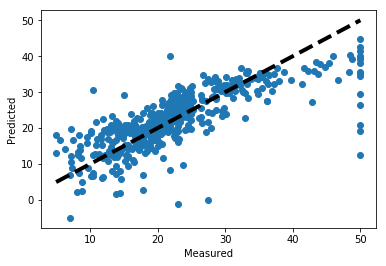

In [17]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import GridSearchCV

In [33]:
## For model persistence

In [34]:
from sklearn.externals import joblib

In [35]:
models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', RidgeCV(alphas=np.logspace(-1,1,10)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LassoCV(alphas=np.logspace(-1,1,10)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', ElasticNetCV(alphas=np.logspace(-1,1,10)))
        ]),
]


parameters = {
    "poly__degree": [1,2],
    "poly__interaction_only": [True, False],
    "poly__include_bias": [True, False],
    "linear__fit_intercept": [True, False]
}

In [36]:
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [37]:
import warnings

In [38]:
warnings.filterwarnings(action = 'ignore')

Ridge算法:最优参数: {'linear__fit_intercept': False, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True}
Ridge算法:R值=0.832
Lasso算法:最优参数: {'linear__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True}
Lasso算法:R值=0.728
ElasticNet算法:最优参数: {'linear__fit_intercept': False, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True}
ElasticNet算法:R值=0.766


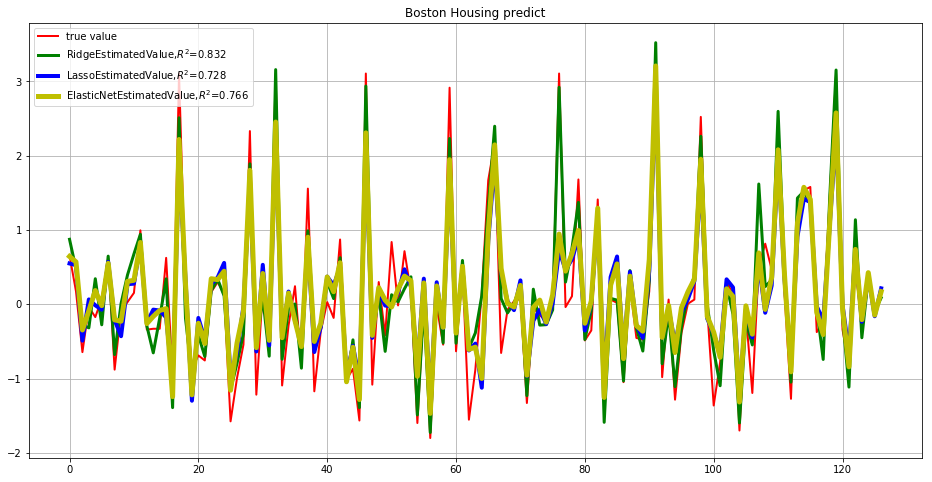

In [47]:
titles = ['Ridge', 'Lasso','ElasticNet']
colors = ['g-', 'b-','y-']
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(ss_X_test))

plt.plot(ln_x_test, ss_y_test, 'r-', lw=2, label=u'true value')
for t in range(3):
    
    model = GridSearchCV(models[t], param_grid=parameters, n_jobs=1)
    
    modelname = "tran_model%s.model" % (t)
    model.fit(ss_X_train, ss_y_train)
    joblib.dump(model, modelname)
    
    print ("%s算法:最优参数:" % titles[t],model.best_params_)
    print ("%s算法:R值=%.3f" % (titles[t], model.best_score_))
    
    y_predict = model.predict(ss_X_test)
    
    plt.plot(ln_x_test, y_predict, colors[t], lw = t + 3, label=u'%sEstimatedValue,$R^2$=%.3f' % (titles[t],model.best_score_))

plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"Boston Housing predict")
plt.show()


In [50]:
model = joblib.load("tran_model2.model")

In [52]:
model.predict(ss_X_test)

array([ 0.64250933,  0.56910257, -0.34679689, -0.08909119,  0.18407429,
       -0.01938338,  0.54996705, -0.21095052, -0.22911546,  0.30686779,
        0.32174431,  0.83085192, -0.26138456, -0.16394711, -0.08397361,
       -0.05987951, -1.24438221,  2.21650971,  0.27562164, -1.21954323,
       -0.25627813, -0.5297983 ,  0.34270409,  0.33005528,  0.44369039,
       -1.1577212 , -0.52395331, -0.10248691,  1.80159473, -0.58468607,
        0.41316394, -0.48630069,  2.45146904, -0.45067773,  0.14938629,
       -0.22111214, -0.57019697,  0.90163096, -0.50159417, -0.25902938,
        0.3665744 ,  0.16787582,  0.55725977, -1.04355617, -0.57960041,
       -1.28287548,  2.30575985, -0.41959807,  0.22175269,  0.05375078,
       -0.0370883 ,  0.20350453,  0.37785149,  0.31474004, -0.97010089,
        0.28574362, -1.46957904,  0.24577418, -0.3110255 ,  1.94523163,
       -0.38812903,  0.50953019, -0.60906226, -0.57779856, -0.99987824,
        0.96086402,  2.14405194,  0.48207297,  0.00943554, -0.03